<a href="https://colab.research.google.com/github/Orto71/Hello-World/blob/main/Unit4Question5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/EmptyHouses2.csv")
print(df)

       GLAID     Borough Priority         Empty Bedroom
0          1      Bexley        2  1 to 3 years      3B
1          2      Bexley        2  1 to 3 years      3B
2          3      Bexley        2  1 to 3 years      2B
3          4      Bexley        4  Over 5 years      3B
4          5      Bexley        3  1 to 3 years      1B
...      ...         ...      ...           ...     ...
11196  11683  Wandsworth        5  Over 5 years      2B
11197  11684  Wandsworth        5  Over 5 years      1B
11198  11685  Wandsworth        5  Over 5 years      1B
11199  11686  Wandsworth        5  Over 5 years      1B
11200  11687  Wandsworth        5  Over 5 years      1B

[11201 rows x 5 columns]


In [ ]:
df.info()

In [37]:
pivot_table = df.pivot_table(
    index='Borough',
    columns='Empty',
    values='GLAID',
    aggfunc='count',
    margins='True',
    margins_name='Grand Total'
    )

In [ ]:
print(pivot_table)

EMPTY_GROUP             1 to 3 years  3 to 5 years  Over 5 years  Unknown  \
Borough                                                                     
Barking and Dagenham            58.0          26.0         230.0      NaN   
Barnet                         242.0         108.0         204.0      2.0   
Bexley                         274.0          72.0          92.0      NaN   
Brent                           58.0          49.0          56.0     62.0   
Bromley                        289.0          36.0          87.0      NaN   
Camden                         205.0          59.0         239.0      9.0   
Croydon                         57.0         259.0         347.0      NaN   
Ealing                         231.0          43.0          67.0     46.0   
Enfield                         29.0          43.0         119.0      NaN   
Greenwich                      201.0          76.0          49.0      NaN   
Hackney                         72.0          35.0          79.0      NaN   

In [38]:
#-----This remove the last column------
columns_to_plot = pivot_table.columns[:-1]
pivot_table_without_total = pivot_table[columns_to_plot]

In [39]:
#----This one removes the last row
pivot_table_without_total = pivot_table[columns_to_plot].iloc[:-1]  # Exclude the last row ('Grand Total')

In [22]:
print(pivot_table_without_total)

Empty                   1 to 3 years  3 to 5 years  Over 5 years  Unknown
Borough                                                                  
Barking and Dagenham            58.0          26.0         230.0      NaN
Barnet                         242.0         108.0         204.0      2.0
Bexley                         274.0          72.0          92.0      NaN
Brent                           58.0          49.0          56.0     62.0
Bromley                        289.0          36.0          87.0      NaN
Camden                         205.0          59.0         239.0      9.0
Croydon                         57.0         259.0         347.0      NaN
Ealing                         231.0          43.0          67.0     46.0
Enfield                         29.0          43.0         119.0      NaN
Greenwich                      201.0          76.0          49.0      NaN
Hackney                         72.0          35.0          79.0      NaN
Hammersmith and Fulham          36.0  

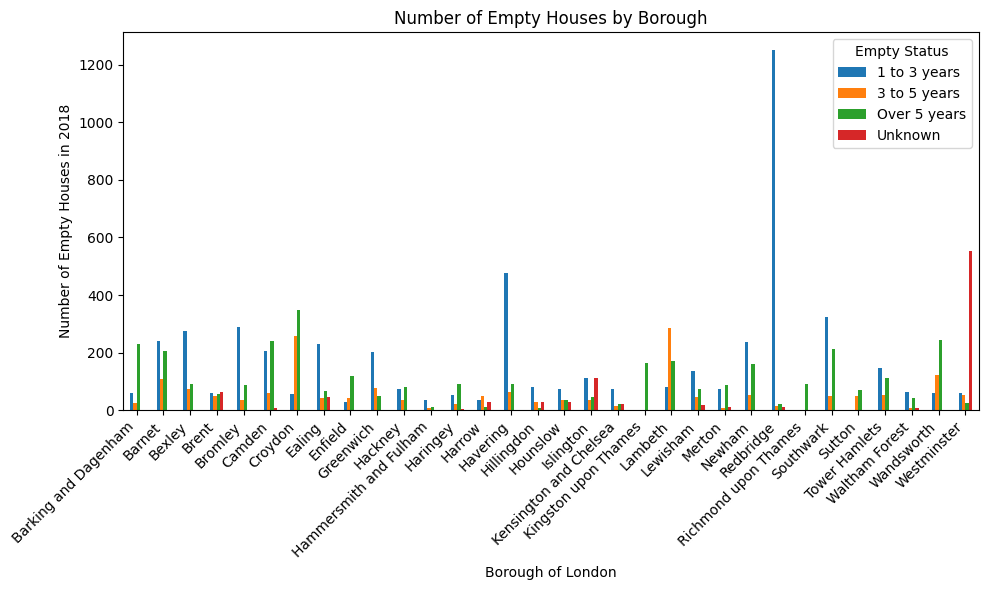

In [40]:

pivot_table_without_total.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Empty Houses by Borough')
plt.xlabel('Borough of London')
plt.ylabel('Number of Empty Houses in 2018')
plt.xticks(rotation=45,ha="right")
plt.legend(title='Empty Status')
plt.tight_layout()
plt.show()

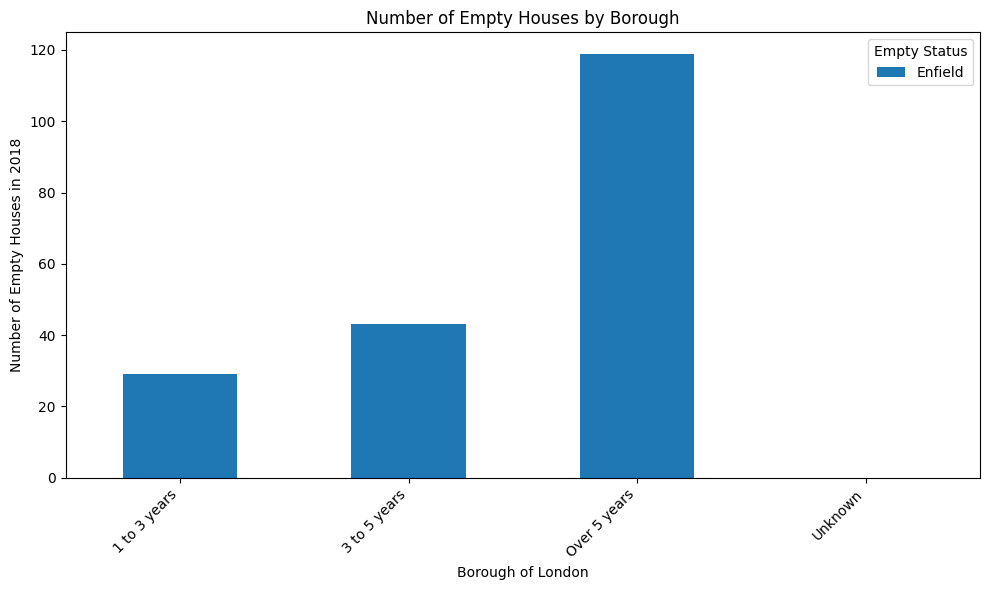

In [31]:
row_to_plot=pivot_table_without_total.loc['Enfield']
row_to_plot.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Empty Houses by Borough')
plt.xlabel('Borough of London')
plt.ylabel('Number of Empty Houses in 2018')
plt.xticks(rotation=45,ha="right")  # Set x-axis labels
plt.legend(title='Empty Status')
plt.tight_layout()
plt.show()

In [44]:
#------prepare the dataset--------
columns_to_boxplot = pivot_table.columns[:-2]  # Exclude the last two columns ('Grand Total' and 'Unknown')
boxplot_to_filter = pivot_table[columns_to_boxplot].iloc[:-1]#<---no last row
filtered_boxplot = boxplot_to_filter[boxplot_to_filter <=600]#<---an outlier was too big

In [ ]:
#-----prepare the boxplot chart
boxprops = dict(linestyle='-', linewidth=2.5, color='darkgoldenrod') # Define box properties (color)
medianprops = dict(linestyle='-', linewidth=2.5, color='firebrick') # Define median line properties (color)
plt.title('Distribution of Empty Houses by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Empty Houses in 2018')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


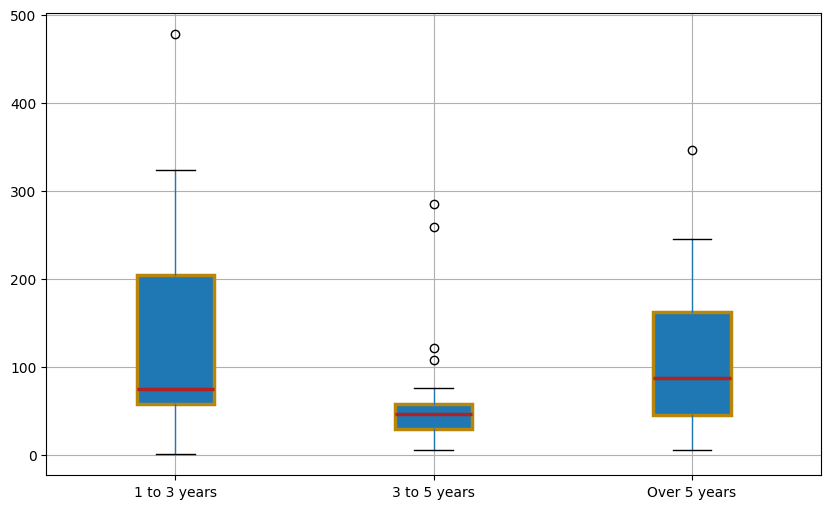

In [49]:
filtered_boxplot.boxplot(
       figsize=(10, 6),
       patch_artist=True,  # Enable filled boxes for color
       boxprops=boxprops, # Apply box properties
       medianprops=medianprops # Apply median properties
   )
plt.show()

In [60]:
pivot_empty_with_total = df.pivot_table(
    index='Empty',#<---no columns after this one
    values='GLAID',
    aggfunc='count',
    margins='True',
    margins_name='Grand Total'
    )

In [61]:
pivot_empty = pivot_empty_with_total.iloc[:-1]  # Exclude the last row ('Grand Total')

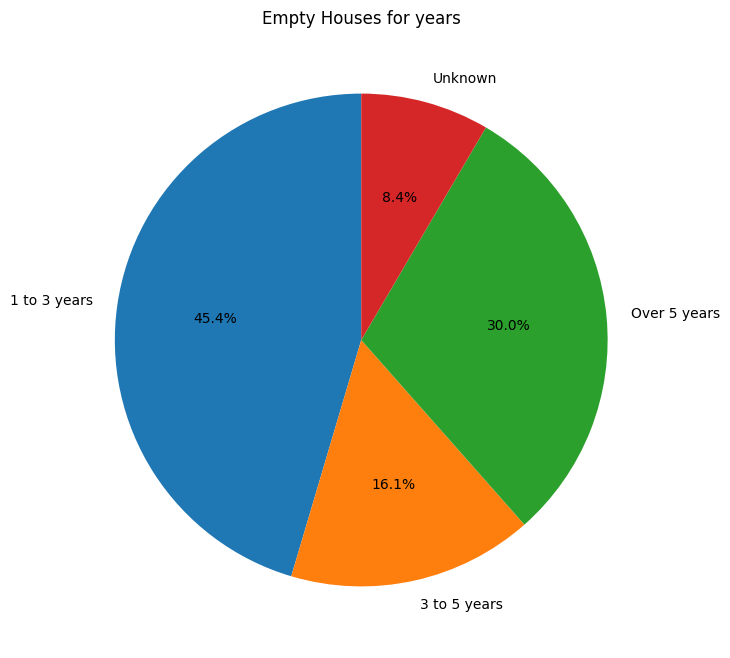

In [62]:
# Create the pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size as needed
plt.pie(pivot_empty['GLAID'], labels=pivot_empty.index, autopct='%1.1f%%', startangle=90)
plt.title('Empty Houses for years')  # Add a title
plt.show()